Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading csv file

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.rename(columns = {'Genre':'Gender'}, inplace = True)

Exploring dataset

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

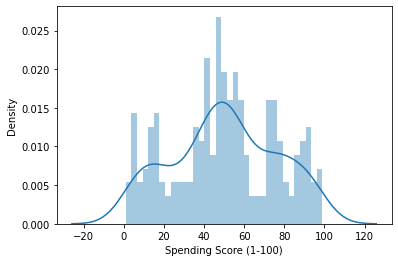

In [6]:
sns.distplot(df['Spending Score (1-100)'],kde=True,bins=35)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

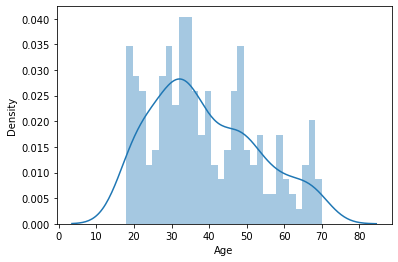

In [7]:
sns.distplot(df['Age'],kde=True,bins=30)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

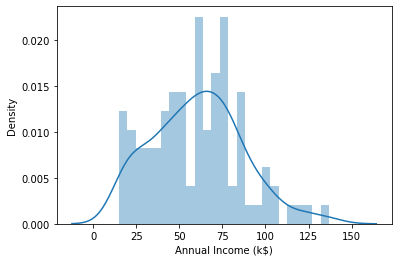

In [24]:
sns.distplot(df['Annual Income (k$)'],kde=True,bins=25)

In [8]:
X=df.drop(['CustomerID'],axis=1)
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


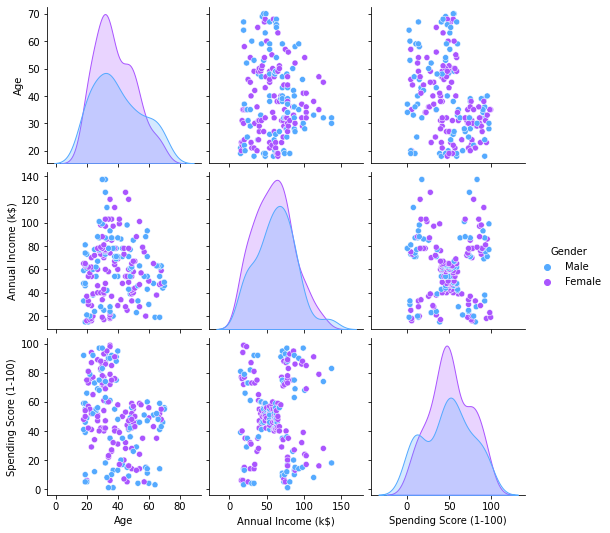

In [9]:
sns.pairplot(X,hue='Gender',palette='cool')

Data PreProcessing

In [10]:
#Categorical variable encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender']=le.fit_transform(X['Gender'])
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


Applying K means clustering

In [11]:
from sklearn.cluster import KMeans

features = ['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']
Y = X[features]
kmeans = KMeans(n_clusters=5)
X['segment']=kmeans.fit_predict(X)




/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualising the clusters

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

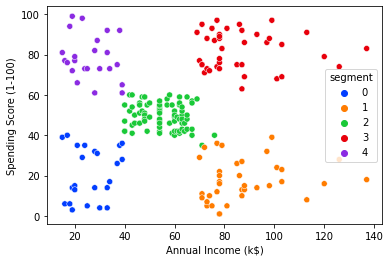

In [12]:
#annual income and spending score
sns.scatterplot(data=X, x='Annual Income (k$)', y='Spending Score (1-100)', hue='segment', palette='bright')

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

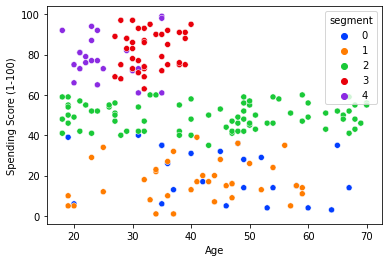

In [13]:
#Age and Spending score
sns.scatterplot(data=X, x='Age', y='Spending Score (1-100)', hue='segment', palette='bright')

In [14]:
cluster_means = X.groupby('segment').mean()
print(cluster_means)

           Gender        Age  Annual Income (k$)  Spending Score (1-100)
segment                                                                 
0        0.391304  45.217391           26.304348               20.913043
1        0.527778  40.666667           87.750000               17.583333
2        0.417722  43.088608           55.291139               49.569620
3        0.461538  32.692308           86.538462               82.128205
4        0.391304  25.521739           26.304348               78.565217


In [19]:
X

,Gender,Age,Annual Income (k$),Spending Score (1-100),segment
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,1
197,1,32,126,74,3
198,1,32,137,18,1


Cluster Statistics

In [25]:
for i in range(5):
    cluster_size = len(X[X['segment'] == i])
    avg_income = np.mean(X[X['segment'] == i]['Annual Income (k$)'])
    avg_spending = np.mean(X[X['segment'] == i]['Spending Score (1-100)'])
    print(f'Cluster {i}: {cluster_size},avg. income = ${avg_income:.2f} customers, avg. spending score = {avg_spending:.2f}')

Cluster 0: 23,avg. income = $26.30 customers, avg. spending score = 20.91
Cluster 1: 36,avg. income = $87.75 customers, avg. spending score = 17.58
Cluster 2: 79,avg. income = $55.29 customers, avg. spending score = 49.57
Cluster 3: 39,avg. income = $86.54 customers, avg. spending score = 82.13
Cluster 4: 23,avg. income = $26.30 customers, avg. spending score = 78.57
